In [1]:
from fastai.vision.all import *
import timm

def is_cat(x): return x[0].isupper() 

/home/alexander/Documents/Programming/photo_enhancement/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

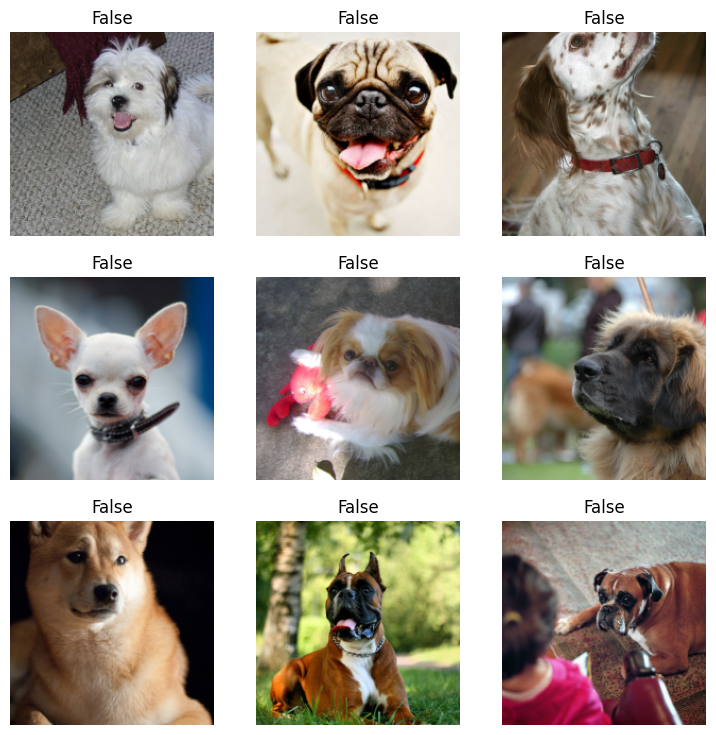

In [3]:
dls.show_batch()

In [4]:
# https://www.kaggle.com/code/afrantsev/which-image-models-are-best/
timm.list_models('convnext_*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_mlp',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_tiny',
 'convnext_tiny_hnf',
 'convnext_xlarge',
 'convnext_xxlarge']

In [5]:
#use model from fastai
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/alexander/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 44.7MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.202679,0.053286,0.019621,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.081549,0.059668,0.017591,00:06
1,0.046306,0.019657,0.007442,00:06
2,0.020108,0.017160,0.005413,00:06


In [5]:
#use model from timm
learn = vision_learner(dls, 'convnext_base', metrics=error_rate).to_fp16()
learn.fine_tune(3)

model.safetensors: 100%|██████████| 354M/354M [00:08<00:00, 40.4MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,0.042044,0.004267,0.001353,00:15


epoch,train_loss,valid_loss,error_rate,time
0,0.005559,0.001774,0.000677,00:20
1,0.005570,0.000168,0.000000,00:20
2,0.002200,0.000187,0.000000,00:20


### Export learner in file

In [7]:
learn.export('model.pkl')

### Export to huggingface

In [8]:
from huggingface_hub import push_to_hub_fastai

repo_id = "asFrants/photo_enhancement"
push_to_hub_fastai(learner=learn, repo_id=repo_id)

model.pkl: 100%|██████████| 355M/355M [01:04<00:00, 5.51MB/s]   


'https://huggingface.co/asFrants/photo_enhancement/tree/main/'

In [10]:
from huggingface_hub import from_pretrained_fastai

repo_id = "asFrants/photo_enhancement"
learn = from_pretrained_fastai(repo_id)

Fetching 4 files: 100%|██████████| 4/4 [00:00<00:00, 82646.38it/s]
